In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import urllib.request
import os
import tarfile

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [0]:
all_df = pd.read_excel("/content/drive/My Drive/titanic3.xls")

In [0]:
cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df = all_df[cols]

In [0]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [0]:
print('total:',len(all_df),'trian:',len(train_df),'test:',len(test_df))

total: 1309 trian: 1064 test: 245


In [0]:
def PreprocessData(raw_df):
  df = raw_df.drop(['name'],axis=1)
  age_mean = df['age'].mean()
  df['age'] = df['age'].fillna(age_mean)
  fare_mean = df['fare'].mean()
  df['fare'] = df['fare'].fillna(fare_mean)
  df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
  x_OneHot_df = pd.get_dummies(data=df,columns=["embarked"])

  ndarray  = x_OneHot_df.values
  Features = ndarray[:, 1:]
  Label = ndarray[:, 0]

  minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
  scaledFeatures = minmax_scale.fit_transform(Features)

  return scaledFeatures, Label

In [0]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [0]:
model = Sequential()
model.add(Dense(units = 40, input_dim = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(x=train_Features,y=train_Label,validation_split=0.1,epochs=30,batch_size=30,verbose=2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 957 samples, validate on 107 samples
Epoch 1/30





 - 10s - loss: 0.6876 - acc: 0.5956 - val_loss: 0.6592 - val_acc: 0.8037
Epoch 2/30
 - 0s - loss: 0.6564 - acc: 0.6196 - val_loss: 0.5561 - val_acc: 0.8037
Epoch 3/30
 - 0s - loss: 0.5914 - acc: 0.6886 - val_loss: 0.4643 - val_acc: 0.8037
Epoch 4/30
 - 0s - loss: 0.5366 - acc: 0.7743 - val_loss: 0.4277 - val_acc: 0.7664
Epoch 5/30
 - 0s - loss: 0.5024 - acc: 0.7743 - val_loss: 0.4197 - val_acc: 0.8131
Epoch 6/30
 - 0s - loss: 0.4869 - acc: 0.7753 - val_loss: 0.4121 - val_acc: 0.7944
Epoch 7/30
 - 0s - loss: 0.4752 - acc: 0.7701 - val_loss: 0.4174 - val_acc: 0.8131
Epoch 8/30
 - 0s - loss: 0.4700 - acc: 0.7795 - val_loss: 0.4057 - val_acc: 0.7944
Epoch 9/30
 - 0s - loss: 0.4647 - acc: 0.7900 - val_loss: 0.4201 - val_acc: 0.8131
Epoch 10/30
 - 0s - loss: 0.4622 - acc: 0.7827 - val_loss: 0.4022 - val_acc: 0.8224
Epoch 11/30
 - 0s 

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

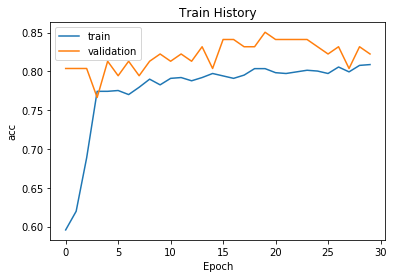

In [0]:
show_train_history(train_history,'acc', 'val_acc')

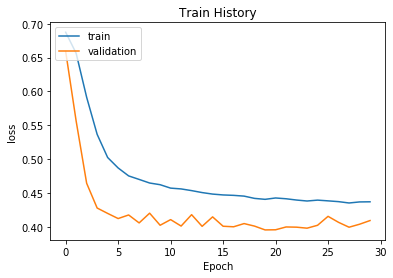

In [0]:
show_train_history(train_history,'loss','val_loss')

In [0]:
scores = model.evaluate(x=test_Features, y=test_Label)
scores[1]

245/245 [==============================] - 0s 80us/step


0.7877551032572376

In [0]:
Jack = pd.Series([0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])
JR_df = pd.DataFrame([list(Jack), list(Rose)], columns = ['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])
all_df = pd.concat([all_df, JR_df])


In [0]:
all_Features, Label = PreprocessData(all_df)


In [0]:
all_probability = model.predict(all_Features)

In [0]:
pd=all_df
pd.insert(len(all_df.columns),'probability',all_probability)

In [41]:
pd[(pd['survived']==0) & (pd['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.976107
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971390
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.978895
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.975925
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.936365


In [43]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.975953
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.633598
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.976107
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.376927
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971390
